# Reinforcement Learning

Q-learning is a model-free reinforcement learning technique. Specifically, Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP).

### Machine Learning Vs Reinforcement Learning

Supervised and unsupervised approaches require data to model, not reinforcement learning! That’s right, it can explore space with a handful of instructions, analyze its surroundings one step at a time, and build data as it goes along for modeling.

In this walk-through, we’ll use Q-learning to find the shortest path between two areas. It has the ability to embark on a journey with no knowledge of what to do next. This approach requires constant trial and error as it collects data about its surroundings and figures out how to accomplish its goal. This opens up interesting possibilities, what about recording additional information, like environmental details along the way that it may not fully understand until after it reaches its goal? And once reached, could it review that additional data to determine if any of it would have helped it reach its goal faster? 

## Q learning example

In [1]:
import numpy as np
import pylab as plt

In [44]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

We create a points-list map that represents each direction our bot can take. Using this format allows us to easily create complex graphs but also easily visualize everything with networkx graphs.

Our starting point is 0 and goal point is 3

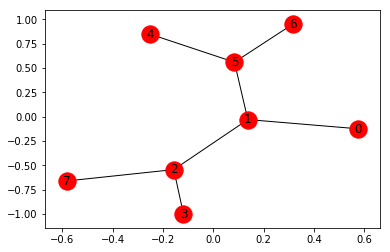

In [45]:
goal = 3

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

The map shows that point 0 is where our bot will start its journey and point 3 is it’s final goal. The extra added points and false paths are the obstacles the bot will have to contend with.

We then create the rewards graph - this is the matrix version of our list of points map. We initialize the matrix to be the height and width of our points list (8 in this example) and initialize all values to -1:

In [46]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

We then change the values to be 0 if it is a viable path and 100 if it is a goal path

In [47]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
  
        R[point] = 100
        
    else:
        R[point] = 0
        

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,  100.,   -1.,   -1.,   -1.,    0.],
        [  -1.,   -1.,    0.,  100.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.]])

The -1's in the table represent null values (i.e.; where there isn't a link between nodes). For example, State 0 cannot go to State 1.

To read the above matrix, the y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions. We then build our Q-learning matrix which will hold all the lessons learned from our bot. The Q-learning model uses a transitional rule formula and gamma is the learning parameter

In [48]:
#Q matrix
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q learning algorithm
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  #Q learning formula
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

# Update Q matrix    
update(initial_state, action, gamma)

max_value 0.0


0

In [49]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))
    
# Normalize the "trained" Q matrix
#print("Trained Q matrix:")
#print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 3:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index



max_value 100.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 64.0
max_value 80.0
max_value 164.0
max_value 0.0
max_value 0.0
max_value 231.2
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 64.0
max_value 80.0
max_value 284.96
max_value 80.0
max_value 64.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 327.968
max_value 64.0
max_value 0.0
max_value 0.0
max_value 262.3744
max_value 0.0
max_value 0.0
max_value 209.89952
max_value 0.0
max_value 262.3744
max_value 327.968
max_value 51.2
max_value 64.0
max_value 362.3744
max_value 64.0
max_value 289.89952
max_value 231.919616
max_value 64.0
max_value 289.89952
max_value 0.0
max_value 289.89952
max_value 0.0
max_value 231.919616
max_value 51.2
max_value 362.3744
max_value 185.5356928
max_value 231.919616
max_value 362.3744
max_value 231.919616


max_value 255.829627759
max_value 499.733793374
max_value 499.787034699
max_value 319.787034699
max_value 399.787034699
max_value 319.787034699
max_value 255.829627759
max_value 499.829627759
max_value 499.863702207
max_value 319.787034699
max_value 255.829627759
max_value 204.663702207
max_value 319.787034699
max_value 319.787034699
max_value 255.829627759
max_value 399.890961766
max_value 399.890961766
max_value 255.829627759
max_value 319.912769413
max_value 399.890961766
max_value 319.912769413
max_value 399.890961766
max_value 399.890961766
max_value 255.829627759
max_value 204.663702207
max_value 399.890961766
max_value 499.863702207
max_value 319.912769413
max_value 255.829627759
max_value 399.890961766
max_value 399.890961766
max_value 204.663702207
max_value 399.890961766
max_value 255.829627759
max_value 399.890961766
max_value 319.912769413
max_value 319.912769413
max_value 319.912769413
max_value 255.93021553
max_value 255.93021553
max_value 399.890961766
max_value 319.9127

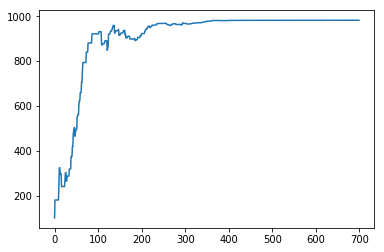

In [50]:
plt.plot(scores)
plt.show()

In [51]:
print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 3]
